2025-03-31 11:37:59,964 - INFO - Dataset loaded successfully. Shape: (22474, 68)
2025-03-31 11:38:05,176 - INFO - Explained variance ratio: [0.07761741 0.05560091]


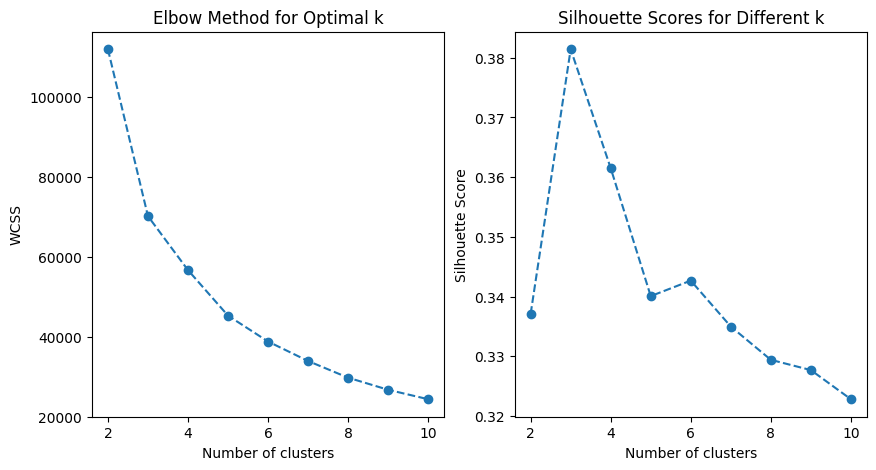

2025-03-31 11:46:51,442 - INFO - Optimal number of clusters: 3
2025-03-31 11:46:55,033 - INFO - Clustering completed. Results saved.


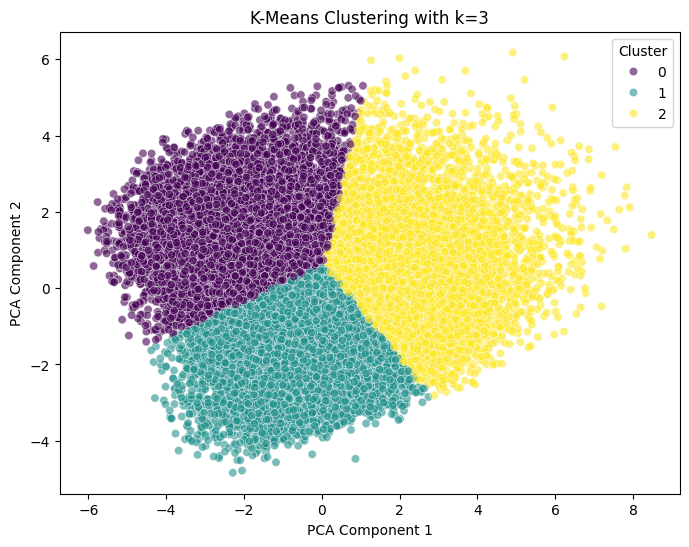

              MH9A       MH9B       MH9C       MH9D       MH9E       MH9F  \
Cluster                                                                     
0        37.824494  69.207007  21.271778  40.507875  28.405175  53.534394   
1        64.135412  51.328889  20.431357  59.426730  25.368114  46.006721   
2        67.605909  53.850892  25.340301  59.539437  32.589604  50.782051   

              MH9G       MH9H  
Cluster                        
0        48.639987  24.988267  
1        33.192926  27.557074  
2        37.483835  30.778567  


In [ ]:
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from logg import logger  # Import logger from logg.py

# Load dataset
data_path = "../data/processed_data_helpfulness.csv"
df = pd.read_csv(data_path)
logger.info(f"Dataset loaded successfully. Shape: {df.shape}")

# Remove target columns (effectiveness scores)
target_columns = ['MH9A', 'MH9B', 'MH9C', 'MH9D', 'MH9E', 'MH9F', 'MH9G', 'MH9H']
X = df.drop(columns=target_columns, errors='ignore')

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
logger.info(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Find optimal number of clusters using the Elbow Method
wcss = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

# Choose optimal k (highest silhouette score)
optimal_k = k_values[np.argmax(silhouette_scores)]
logger.info(f"Optimal number of clusters: {optimal_k}")

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_pca)

# Save results
df.to_csv("../data/clustered_data.csv", index=False)
logger.info("Clustering completed. Results saved.")

# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.legend(title='Cluster')
plt.show()

# Analyze relationship with effectiveness scores
cluster_means = df.groupby('Cluster')[target_columns].mean()
print(cluster_means)


2025-04-09 14:47:45,100 - INFO - ✅ Dataset loaded successfully. Shape: (22474, 68)
2025-04-09 14:47:45,469 - INFO - ✅ PCA explained variance ratio: [0.07761741 0.05560091]


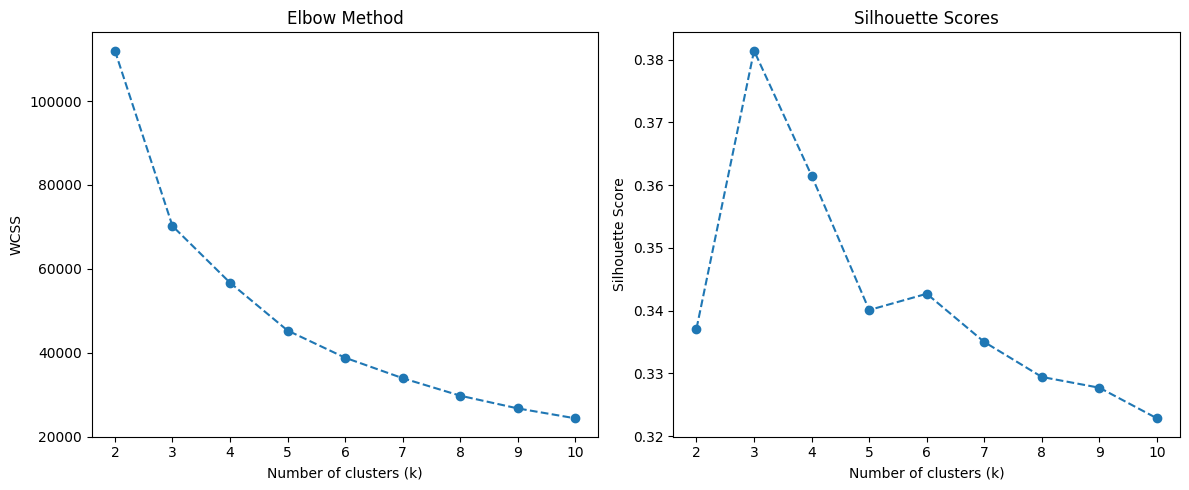

2025-04-09 14:50:15,512 - INFO - ✅ Optimal number of clusters based on silhouette score: 3
2025-04-09 14:50:16,764 - INFO - ✅ Clustering completed and results saved to clustered_data.csv.


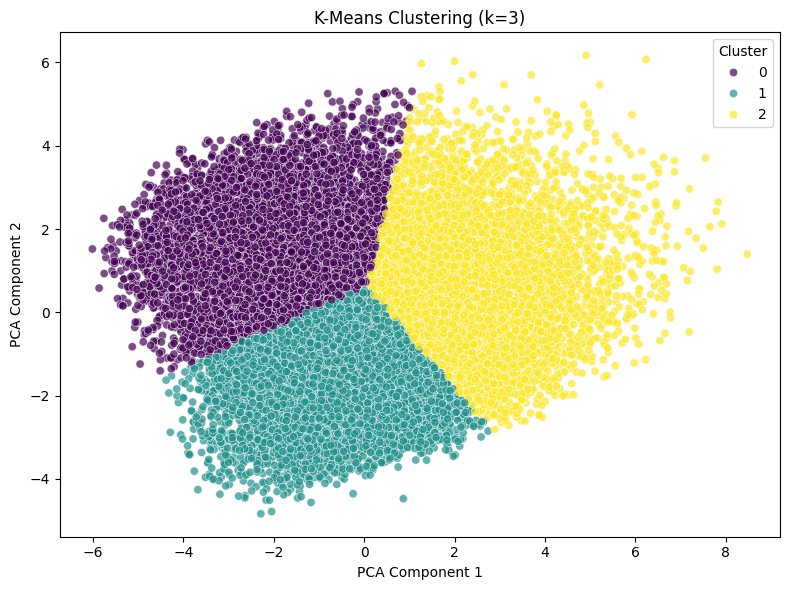


📊 Average Effectiveness Scores by Cluster:
              MH9A       MH9B       MH9C       MH9D       MH9E       MH9F  \
Cluster                                                                     
0        37.824494  69.207007  21.271778  40.507875  28.405175  53.534394   
1        64.135412  51.328889  20.431357  59.426730  25.368114  46.006721   
2        67.605909  53.850892  25.340301  59.539437  32.589604  50.782051   

              MH9G       MH9H  
Cluster                        
0        48.639987  24.988267  
1        33.192926  27.557074  
2        37.483835  30.778567  


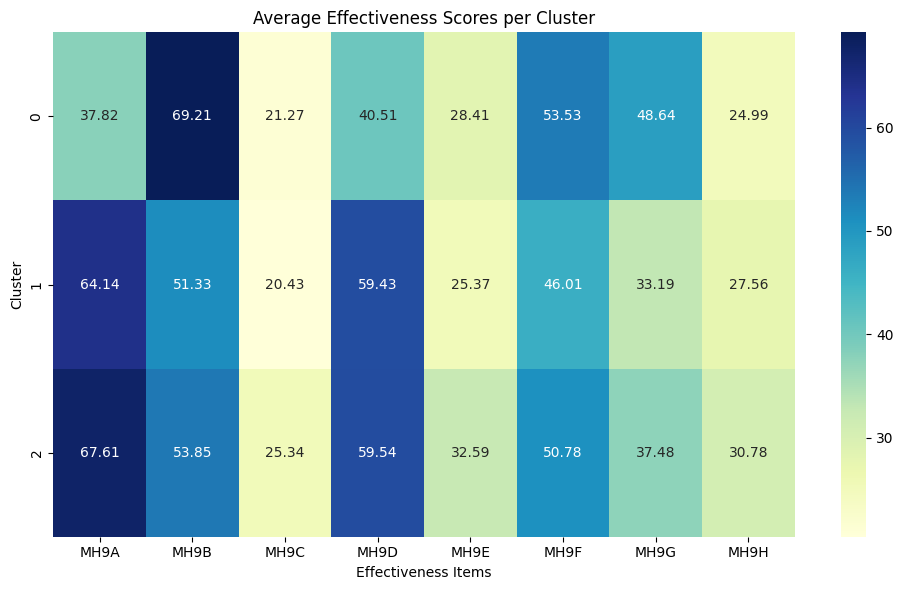

In [1]:
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from logg import logger  # Custom logger

# -----------------------------
# Step 1: Load dataset
# -----------------------------
data_path = "../data/processed_data_helpfulness.csv"
df = pd.read_csv(data_path)
logger.info(f"✅ Dataset loaded successfully. Shape: {df.shape}")

# -----------------------------
# Step 2: Prepare data
# -----------------------------
# Drop effectiveness/helpfulness score columns before clustering
target_columns = ['MH9A', 'MH9B', 'MH9C', 'MH9D', 'MH9E', 'MH9F', 'MH9G', 'MH9H']
X = df.drop(columns=target_columns, errors='ignore')

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Step 3: Dimensionality Reduction
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
logger.info(f"✅ PCA explained variance ratio: {pca.explained_variance_ratio_}")

# -----------------------------
# Step 4: Determine Optimal Clusters (Elbow + Silhouette)
# -----------------------------
wcss = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Plot Elbow Method and Silhouette Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.tight_layout()
plt.show()

# -----------------------------
# Step 5: Apply Optimal KMeans Clustering
# -----------------------------
optimal_k = k_values[np.argmax(silhouette_scores)]
logger.info(f"✅ Optimal number of clusters based on silhouette score: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_pca)

# Save clustered data
df.to_csv("../data/clustered_data.csv", index=False)
logger.info("✅ Clustering completed and results saved to clustered_data.csv.")

# -----------------------------
# Step 6: Visualize Clusters
# -----------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# -----------------------------
# Step 7: Analyze Relationship Between Clusters & Helpfulness Scores
# -----------------------------
# Compare mean effectiveness scores across clusters
cluster_means = df.groupby('Cluster')[target_columns].mean()
print("\n📊 Average Effectiveness Scores by Cluster:")
print(cluster_means)

# Optional: Visualize as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Average Effectiveness Scores per Cluster")
plt.ylabel("Cluster")
plt.xlabel("Effectiveness Items")
plt.tight_layout()
plt.show()

# -----------------------------
# 📌 Purpose of Clustering:
# -----------------------------
# We used unsupervised clustering (K-Means) to identify inherent groupings in the data.
# Then, we analyzed whether these clusters differ in terms of their average effectiveness/helpfulness scores.
# If clusters show clear separation in these scores, it suggests that the response patterns can predict
# perceived helpfulness, which could be used for targeted interventions or content adjustments.


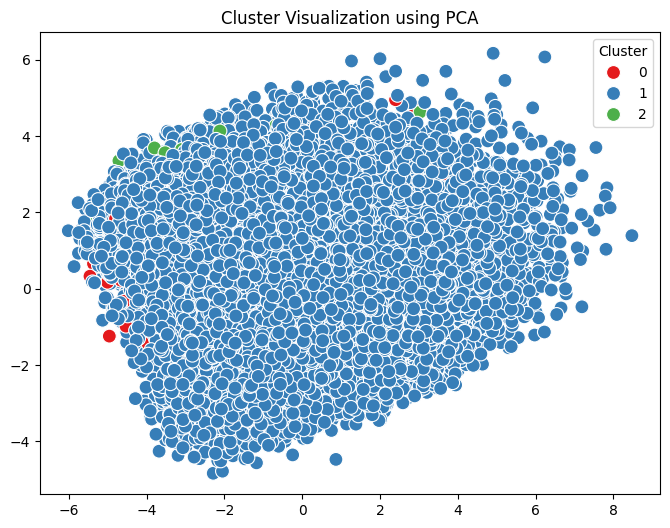

               W1        W4       W5A       W5B       W5C       W5D       W5E  \
Cluster                                                                         
0        1.034483  0.748011  0.816976  1.453581  0.543767  1.254642  0.469496   
1        1.407656  1.121707  1.184550  1.456184  0.878659  1.386206  0.823911   
2        1.206009  0.824034  0.862661  1.493562  0.493562  1.377682  0.437768   

              W5F       W5G        W6  ...  EMP_2010_6.1     W10_1     W10_2  \
Cluster                                ...                                     
0        0.803714  1.485411  0.397878  ...      0.000000  0.660477  0.270557   
1        1.195618  1.863428  0.708791  ...      0.054519  0.551226  0.321350   
2        0.965665  1.789700  0.557940  ...      0.000000  0.523605  0.326180   

            W10_3    W10_99    W11A_1    W11A_2    W11A_3    W11A_4   W11A_99  
Cluster                                                                        
0        0.039788  0.029178  0.75

In [2]:
# unsupervised_learning.ipynb
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (we will use the original dataset before label processing)
data_path = '../data/processed_data_helpfulness.csv'
df = pd.read_csv(data_path)

# 1. Data Preprocessing (Standardize the data)
# Drop the target columns to focus on features
features = df.drop(columns=['MH9A', 'MH9B', 'MH9C', 'MH9D', 'MH9E', 'MH9F', 'MH9G', 'MH9H'])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 2. Perform KMeans Clustering to identify clusters in the data
kmeans = KMeans(n_clusters=3, random_state=42)  # We assume 3 clusters for now (you can experiment)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the dataframe
df['Cluster'] = clusters

# 3. Visualize the clusters using PCA for dimensionality reduction (2D visualization)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Cluster Visualization using PCA')
plt.show()

# 4. Analyze the clusters
cluster_summary = df.groupby('Cluster').mean()  # Summary statistics for each cluster
print(cluster_summary)

# 5. Check if clusters correlate with the target columns
for target in ['MH9A', 'MH9B', 'MH9C', 'MH9D', 'MH9E', 'MH9F', 'MH9G', 'MH9H']:
    correlation = df.groupby('Cluster')[target].mean()
    print(f"Correlation between clusters and {target} (Effectiveness Score):\n{correlation}\n")

# 6. Silhouette Score to evaluate clustering quality
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score for clustering: {sil_score}')


2025-04-10 04:11:37,535 - INFO - Dataset loaded successfully from ../data/processed_data_helpfulness.csv. Shape: (22474, 68)
2025-04-10 04:12:06,753 - INFO - Silhouette Score for 3 clusters: 0.1581


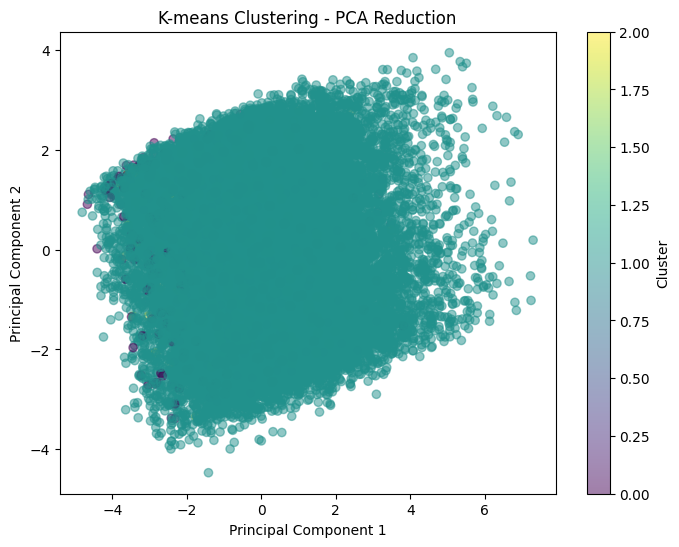

2025-04-10 04:12:14,614 - INFO - Average target distribution for each cluster:
2025-04-10 04:12:14,615 - INFO -               MH9A       MH9B       MH9C       MH9D       MH9E       MH9F  \
Cluster                                                                     
0        23.007958  58.806366  17.023873  28.063660  18.777188  47.822281   
1        58.845637  56.873262  22.395536  54.810465  28.675128  49.621432   
2        31.339056  74.051502  15.261803  41.613734  29.223176  51.965665   

              MH9G       MH9H  
Cluster                        
0        41.522546  17.687003  
1        38.693240  28.104921  
2        48.231760  22.738197  
2025-04-10 04:12:14,829 - INFO - Clustering and analysis completed successfully.


In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from logg import logger  # Import logger from logg.py

# Define the data path
data_path = '../data/processed_data_helpfulness.csv'

def apply_kmeans(df, num_clusters=3):
    # Preprocess data (standardize)
    X = df.drop(columns=['MH9A', 'MH9B', 'MH9C', 'MH9D', 'MH9E', 'MH9F', 'MH9G', 'MH9H'])  # Exclude target columns
    X = StandardScaler().fit_transform(X)  # Standardize features
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    # Calculate Silhouette Score for cluster quality
    silhouette_avg = silhouette_score(X, clusters)
    logger.info(f"Silhouette Score for {num_clusters} clusters: {silhouette_avg:.4f}")
    
    return clusters

def visualize_clusters(df, clusters):
    # Reduce dimensions to 2D using PCA
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(df)
    
    # Plot clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
    plt.title("K-means Clustering - PCA Reduction")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label="Cluster")
    plt.show()

def analyze_clusters_with_targets(df, clusters):
    # Add cluster labels to the dataframe for analysis
    df['Cluster'] = clusters
    target_columns = ['MH9A', 'MH9B', 'MH9C', 'MH9D', 'MH9E', 'MH9F', 'MH9G', 'MH9H']
    
    # Analyze distribution of targets within each cluster
    cluster_target_distribution = df.groupby('Cluster')[target_columns].mean()
    logger.info("Average target distribution for each cluster:")
    logger.info(cluster_target_distribution)

def main():
    try:
        # Load the dataset
        df = pd.read_csv(data_path)
        logger.info(f"Dataset loaded successfully from {data_path}. Shape: {df.shape}")
        
        # Apply K-means clustering (let's assume 3 clusters for now)
        clusters = apply_kmeans(df, num_clusters=3)
        
        # Visualize the clusters
        visualize_clusters(df.drop(columns=['MH9A', 'MH9B', 'MH9C', 'MH9D', 'MH9E', 'MH9F', 'MH9G', 'MH9H']), clusters)
        
        # Analyze how the clusters relate to the target variables
        analyze_clusters_with_targets(df, clusters)
        
        logger.info("Clustering and analysis completed successfully.")

    except FileNotFoundError:
        logger.error(f"File not found: {data_path}. Please check the file path.")
    except Exception as e:
        logger.error(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    main()


2025-04-10 04:46:55,173 - INFO - Dataset loaded successfully from ../data/processed_data_helpfulness.csv. Shape: (22474, 68)


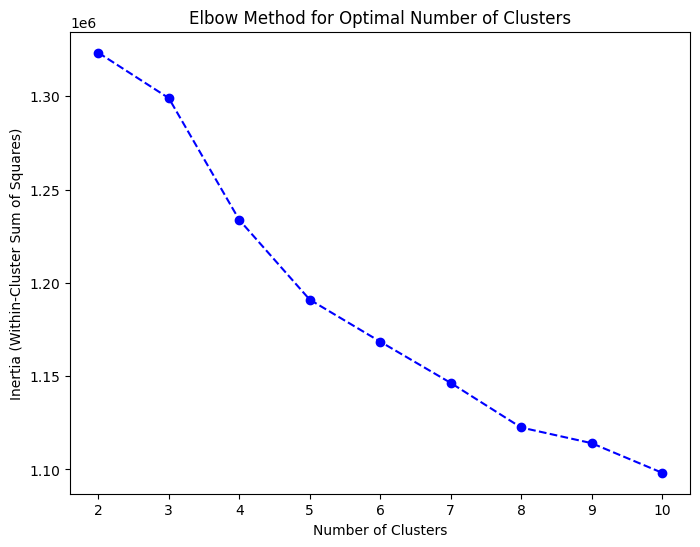

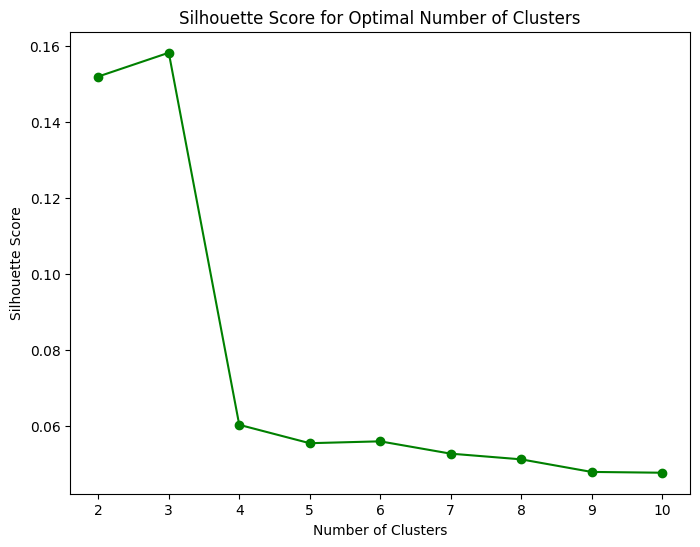

2025-04-10 04:48:12,267 - INFO - Optimal number of clusters based on Silhouette Score: 3
2025-04-10 04:48:20,989 - INFO - Silhouette Score for 3 clusters: 0.1581


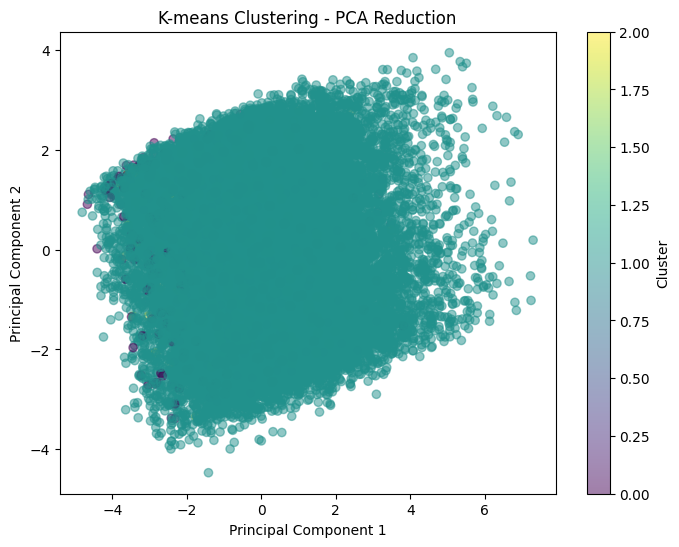

2025-04-10 04:48:21,486 - ERROR - An unexpected error occurred: invalid index to scalar variable.


In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from logg import logger  # Import logger from logg.py

# Define the data path
data_path = '../data/processed_data_helpfulness.csv'

def apply_kmeans(df, num_clusters=3):
    # Preprocess data (standardize)
    X = df.drop(columns=['MH9A', 'MH9B', 'MH9C', 'MH9D', 'MH9E', 'MH9F', 'MH9G', 'MH9H'])  # Exclude target columns
    X = StandardScaler().fit_transform(X)  # Standardize features
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    # Calculate Silhouette Score for cluster quality
    silhouette_avg = silhouette_score(X, clusters)
    logger.info(f"Silhouette Score for {num_clusters} clusters: {silhouette_avg:.4f}")
    
    return clusters

def visualize_clusters(df, clusters):
    # Reduce dimensions to 2D using PCA
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(df)
    
    # Plot clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
    plt.title("K-means Clustering - PCA Reduction")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label="Cluster")
    plt.show()

from scipy import stats

# Function to safely extract the mode
def safe_mode(x):
    mode_result = stats.mode(x)
    # Check if the mode count is valid (greater than 0)
    if mode_result.count[0] > 0:
        return mode_result.mode[0]
    return None  # In case of no valid mode, return None




def find_optimal_clusters(df, max_clusters=10):
    # Preprocess data (standardize)
    X = df.drop(columns=['MH9A', 'MH9B', 'MH9C', 'MH9D', 'MH9E', 'MH9F', 'MH9G', 'MH9H'])  # Exclude target columns
    X = StandardScaler().fit_transform(X)  # Standardize features

    # Use the Elbow Method to find the optimal number of clusters
    inertia = []
    silhouette_scores = []
    
    for num_clusters in range(2, max_clusters + 1):  # Start from 2 clusters to max_clusters
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
        
        # Calculate Silhouette Score
        silhouette_avg = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
        
    # Plot Elbow Method (Inertia vs. Number of clusters)
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), inertia, marker='o', linestyle='--', color='b', label="Inertia")
    plt.title("Elbow Method for Optimal Number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
    plt.show()

    # Plot Silhouette Score for each number of clusters
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='-', color='g', label="Silhouette Score")
    plt.title("Silhouette Score for Optimal Number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.show()

    # Determine optimal number of clusters based on highest silhouette score
    optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 to account for the range starting at 2
    logger.info(f"Optimal number of clusters based on Silhouette Score: {optimal_clusters}")
    
    return optimal_clusters

def main():
    try:
        # Load the dataset
        df = pd.read_csv(data_path)
        logger.info(f"Dataset loaded successfully from {data_path}. Shape: {df.shape}")
        
        # Find the optimal number of clusters
        optimal_clusters = find_optimal_clusters(df, max_clusters=10)
        
        # Apply K-means clustering with the optimal number of clusters
        clusters = apply_kmeans(df, num_clusters=optimal_clusters)
        
        # Visualize the clusters
        visualize_clusters(df.drop(columns=['MH9A', 'MH9B', 'MH9C', 'MH9D', 'MH9E', 'MH9F', 'MH9G', 'MH9H']), clusters)
        
        # Analyze how the clusters relate to the target variables
        analyze_clusters_with_targets(df, clusters)
        
        logger.info("Clustering and analysis completed successfully.")

    except FileNotFoundError:
        logger.error(f"File not found: {data_path}. Please check the file path.")
    except Exception as e:
        logger.error(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    main()


2025-04-10 06:07:26,901 - INFO - Dataset loaded successfully. Shape: (22474, 68)
2025-04-10 06:07:27,235 - INFO - Explained variance ratio: [0.07761741 0.05560091]


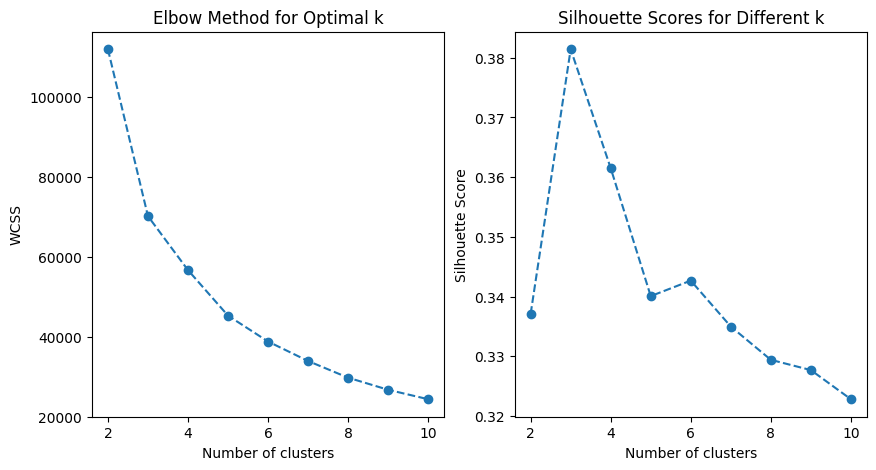

2025-04-10 06:09:15,184 - INFO - Optimal number of clusters: 3
2025-04-10 06:09:16,310 - INFO - Clustering completed. Results saved.


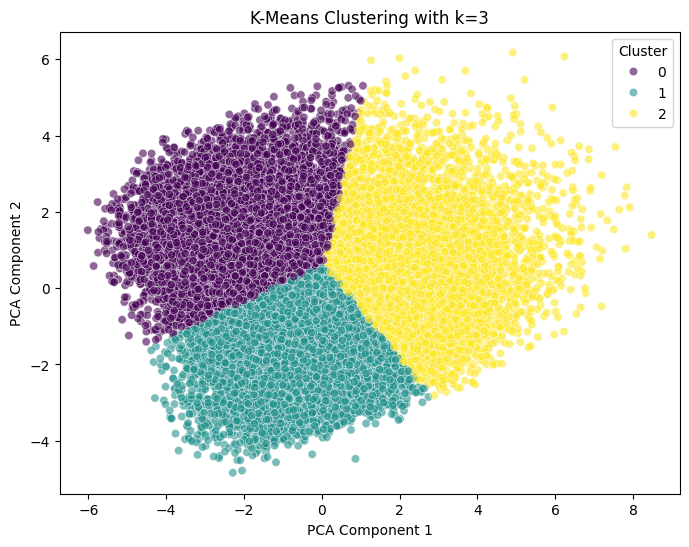

AttributeError: 'DataFrameGroupBy' object has no attribute 'mode'

In [ ]:
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from logg import logger  # Import logger from logg.py

# Load dataset
data_path = "../data/processed_data_helpfulness.csv"
df = pd.read_csv(data_path)
logger.info(f"Dataset loaded successfully. Shape: {df.shape}")

# Remove target columns (effectiveness scores)
target_columns = ['MH9A', 'MH9B', 'MH9C', 'MH9D', 'MH9E', 'MH9F', 'MH9G', 'MH9H']
X = df.drop(columns=target_columns, errors='ignore')

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
logger.info(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Find optimal number of clusters using the Elbow Method
wcss = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

# Choose optimal k (highest silhouette score)
optimal_k = k_values[np.argmax(silhouette_scores)]
logger.info(f"Optimal number of clusters: {optimal_k}")

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_pca)

# Save results
df.to_csv("../data/clustered_data.csv", index=False)
logger.info("Clustering completed. Results saved.")

# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.legend(title='Cluster')
plt.show()

# Analyze relationship with effectiveness scores (using median)
cluster_medians = df.groupby('Cluster')[target_columns].median()
logger.info("Median target distribution for each cluster:")
logger.info(cluster_medians)

# Print the median values
print(cluster_medians)
